In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('city_day.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
(df.isnull().sum()/29531) *100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [ ]:
dfnull = df.isnull()
dfnull = dfnull.drop(['City'], axis=1)
dfnull = pd.concat([df['City'], dfnull], axis=1)

In [ ]:
dfnull.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,Ahmedabad,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,Ahmedabad,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,Ahmedabad,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,Ahmedabad,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True


['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene', 'Toluene', 'Xylene', 'AQI']

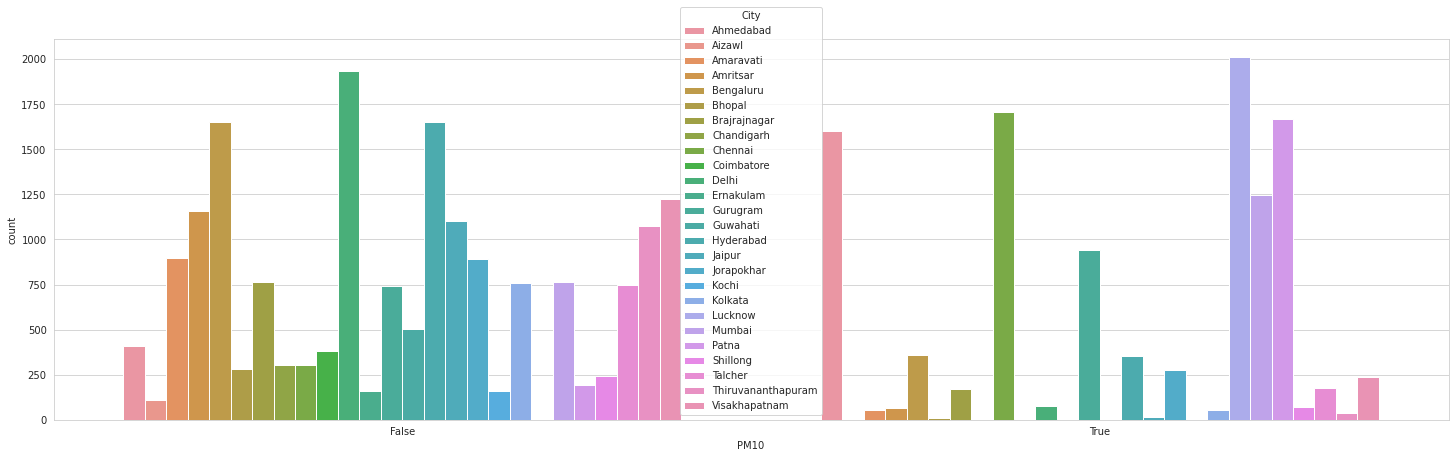

In [ ]:
plt.figure(figsize=(25, 7))
sns.set_style('whitegrid')
sns.countplot(x = 'PM10', hue = 'City', data = dfnull)

Columns with missing data greater than 30 % are not usefull so we drop them

In [ ]:
df = df.drop(['PM10', 'NH3', 'Xylene'], axis = 1)

In [ ]:
df = df[df['AQI'].notna()]

In [ ]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   NO          24463 non-null  float64
 4   NO2         24459 non-null  float64
 5   NOx         22993 non-null  float64
 6   CO          24405 non-null  float64
 7   SO2         24245 non-null  float64
 8   O3          24043 non-null  float64
 9   Benzene     21315 non-null  float64
 10  Toluene     19024 non-null  float64
 11  AQI         24850 non-null  float64
 12  AQI_Bucket  24850 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.7+ MB


In [ ]:
df.isnull().sum()

City             0
Date             0
PM2.5          678
NO             387
NO2            391
NOx           1857
CO             445
SO2            605
O3             807
Benzene       3535
Toluene       5826
AQI              0
AQI_Bucket       0
dtype: int64

In [ ]:
# city = pd.get_dummies(df['City'], drop_first=True)

# df = df.drop(['City'], axis=1)

# df = pd.concat([city, df], axis = 1)

# df = df.drop(['Date'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   NO          24463 non-null  float64
 4   NO2         24459 non-null  float64
 5   NOx         22993 non-null  float64
 6   CO          24405 non-null  float64
 7   SO2         24245 non-null  float64
 8   O3          24043 non-null  float64
 9   Benzene     21315 non-null  float64
 10  Toluene     19024 non-null  float64
 11  AQI         24850 non-null  float64
 12  AQI_Bucket  24850 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.7+ MB


In [ ]:
df.shape

(24850, 13)

In [ ]:
df_new = df.iloc[:, 2:12]
df_new.head()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI
28,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0
29,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0
30,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0
31,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0
32,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(np.array(df.iloc[:, 2:11]))
X_train = imputer.transform(np.array(df.iloc[:, 2:11]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])

In [ ]:
y_train = np.array(df['AQI'])

In [ ]:
y_train_classif = np.array(df['AQI_Bucket'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cl = RandomForestClassifier()

cl.fit(X_train, y_train_classif)

parameters = [{'criterion': ['gini', 'entropy'], 'n_estimators': [100, 125], 'verbose':[1]}]

# , 'max_features': ['sqrt', 'log2']

grid_search = GridSearchCV(estimator = cl, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs= -1)

# Using the full dataset (train + test) since we have validation set ...

grid_search.fit(X_train, y_train_classif)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print(f"Best Accuracy : {best_accuracy}")

print(f" Best Parameters : ")

print(best_parameters)


KeyboardInterrupt: ignored

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier()

cl.fit(X_train, y_train_classif)

parameters = [{'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = cl, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs= -1)

# Using the full dataset (train + test) since we have validation set ...

grid_search.fit(X_train, y_train_classif)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print(f"Best Accuracy : {best_accuracy}")

print(f" Best Parameters : ")

print(best_parameters)

Best Accuracy : 0.5883299798792756
 Best Parameters : 
{'criterion': 'entropy'}
CPU times: user 1.24 s, sys: 26.9 ms, total: 1.27 s
Wall time: 5.47 s


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 35.62 %
Standard Deviation: 42.48 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10)

regressor.fit(X_train, y_train)



RandomForestRegressor(n_estimators=10)

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 63.11 %
Standard Deviation: 22.44 %


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 2:11], df.iloc[:, 11], test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_regressor = PolynomialFeatures(degree = 3)
X_poly = poly_regressor.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [ ]:
poly_X_test = poly_regressor.transform(X_test)
y_pred = regressor.predict(poly_X_test)
print(y_pred.shape)
print(y_test.shape)

(4970,)
(4970,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8378310252724046
29.065854711695753
